# Análise exploratória das emissões de CO² no Brasil período de 1901 -2018


O objetivo da análise foi explorar um dataset de emissões de CO² tendo o Brasil como país alvo, a fim de levantar idéias através de um conjunto de dados.

## Descrição dos dados

Os dados das emissões de CO² foram obtidos do site https://ourworldindata.org/, através do dataset " Data on CO2 and Greenhouses Gases Emissions datasets" onde consta as emissões de CO² e outros gases de efeito estufa de diferentes países ao longo de anos. Os dados foram coletados, agregados e documentados por Hannah Ritchie, Max Roser and Edouard Mathieu.

Informações a respeito das fontes onde os dados foram coletados e o dataset podem ser encontrados no link abaixo:

https://github.com/owid/co2-data

A descrição de cada uma das variáveis pode ser encontrada neste link:

https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv



## Importando bibliotecas:

In [1]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Importando os dados:

In [2]:
#Carregando o conjunto de dados
dados = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
#Visualizando o conjunto de dados
dados.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,0.000,0.000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [3]:
#Verificando o quais os países constam no dataset
dados['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctic Fisheries', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (excl. China & India)', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican R

### Selecionando os dados de "World":

In [4]:
#selecionando os dados de todo o planeta 
selecao= dados['country'] == 'World'
#Criando um DataFrame com os dados selecionados
mundo = dados[selecao]
#Visualizando o DataFrame
mundo.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
23395,OWID_WRL,World,1751,9.351,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23396,OWID_WRL,World,1752,9.354,0.039,0.004,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23397,OWID_WRL,World,1753,9.354,0.000,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23398,OWID_WRL,World,1754,9.358,0.039,0.004,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23399,OWID_WRL,World,1755,9.362,0.039,0.004,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Análise gráfica dos dados:

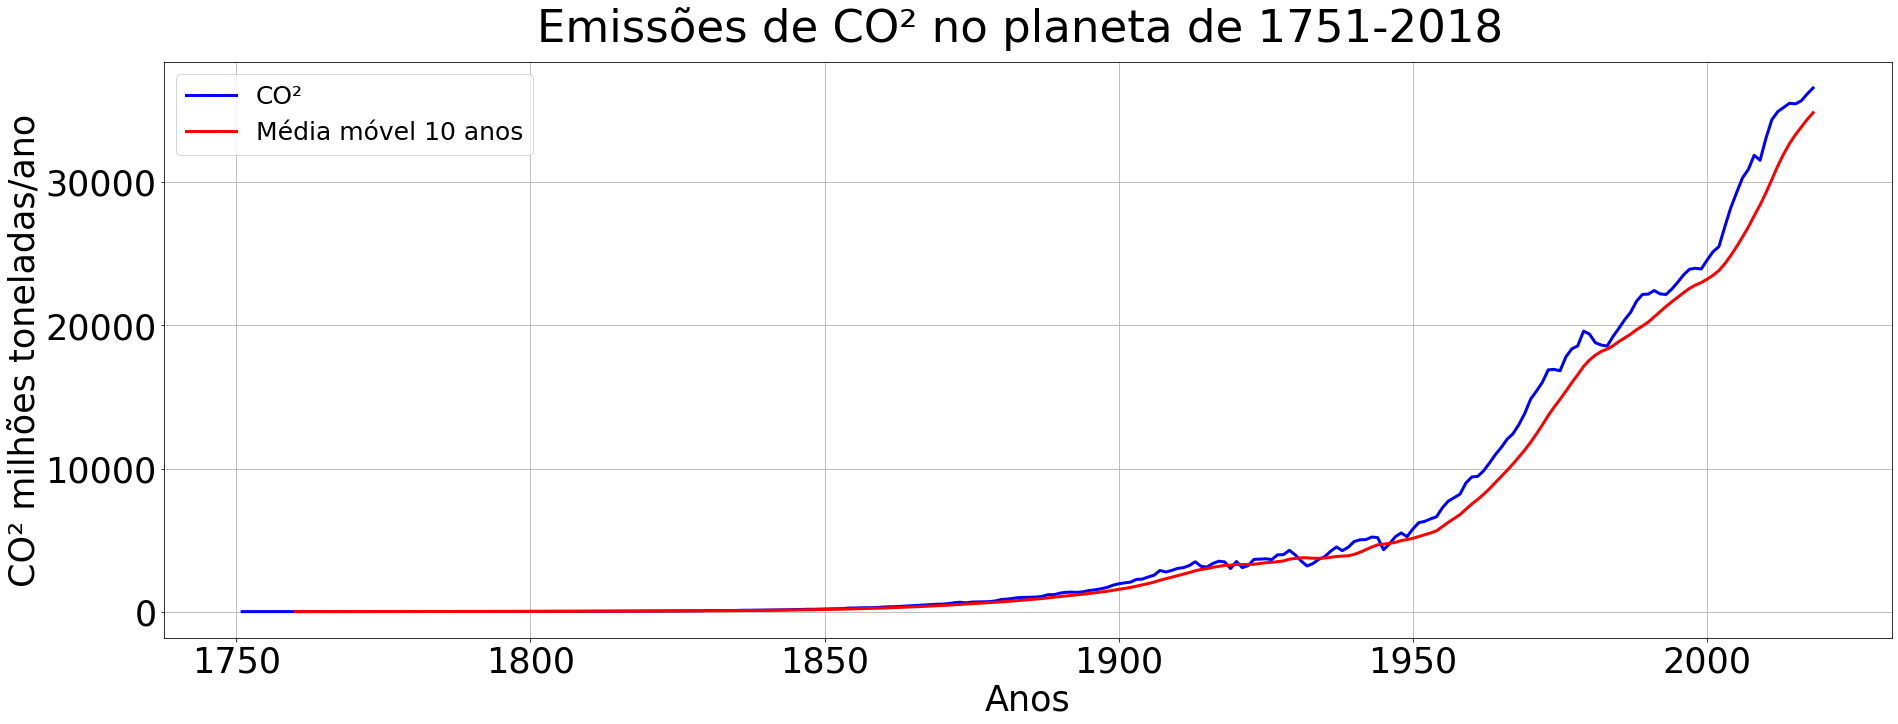

In [5]:
#Estabelecendo o tamanho do gráfico
fig=plt.figure(figsize=(24,8))
eixo = fig.add_axes([0,0,1,1])
#Criando o gráfico de emissão de CO2 por ano na cor azul e legenda
eixo.plot(mundo['year'], mundo['co2'],color='b',label='CO²',linewidth=3)
eixo.plot(mundo['year'],mundo['co2'].rolling(10).mean(), color='r',label='Média móvel 10 anos',linewidth=3)
#Colocando título do gráfico e escolhendo o tamanho da fonte
eixo.set_title('Emissões de CO² no planeta de 1751-2018 ', fontsize=45, pad=20)
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Anos', fontsize=35)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
eixo.set_ylabel('CO² milhões toneladas/ano', fontsize=35)
#Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 35)
#Colocando um grid no fundo do gráfico
eixo.grid(True)
#Colocando a legenda e o tamanho da fonte
eixo.legend(fontsize=25)

Como é possível observar no gráfico acima, há um aumento na quantidade de CO² no planeta de 1751 a 2018, assim como uma tendência de crescente dessa quantidade (média móvel). Diversos fatores contribuem para esse aumento, sendo o principal deles o uso de combustíveis fósseis.

## Selecionando dados do Brasil: 

In [6]:
#Selecionando somente os dados do Brasil
selecao =  dados['country'] == 'Brazil'
#Criando um DataFrame somente com os dados do Brasil
bra = dados[selecao]
#Visualizando o DataFrame
bra.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
3108,BRA,Brazil,1901,2.103,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18513216.0,1.199158e+10
3109,BRA,Brazil,1902,2.506,19.164,0.403,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18923954.0,1.198292e+10
3110,BRA,Brazil,1903,2.440,-2.632,-0.066,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19341472.0,1.221766e+10
3111,BRA,Brazil,1904,2.620,7.357,0.180,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19762800.0,1.245733e+10
3112,BRA,Brazil,1905,2.799,6.853,0.180,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20187716.0,1.282192e+10


In [7]:
#Verificando informações a respeito do DataFrame
bra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 3108 to 3225
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   iso_code                     118 non-null    object 
 1   country                      118 non-null    object 
 2   year                         118 non-null    int64  
 3   co2                          118 non-null    float64
 4   co2_growth_prct              117 non-null    float64
 5   co2_growth_abs               117 non-null    float64
 6   consumption_co2              28 non-null     float64
 7   trade_co2                    28 non-null     float64
 8   trade_co2_share              28 non-null     float64
 9   co2_per_capita               118 non-null    float64
 10  consumption_co2_per_capita   28 non-null     float64
 11  share_global_co2             118 non-null    float64
 12  cumulative_co2               118 non-null    float64
 13  share_global_cum

## Selecionando variáveis: 

In [8]:
#Selecionando variáveis que podem ser exploradas no dataset (escolhidas a que não possuiam valores nulos(NAN))
bra = bra[['year','co2','co2_growth_prct','co2_growth_abs','co2_per_capita','cumulative_co2','cement_co2','coal_co2','flaring_co2','gas_co2','oil_co2','gas_co2_per_capita','oil_co2_per_capita','population']]
#Visualizando o cabeçalho do DataFrame
bra.head()

,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,cumulative_co2,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,gas_co2_per_capita,oil_co2_per_capita,population
3108,1901,2.103,NaN,NaN,0.0,2.103,0.0,2.103,0.0,0.0,0.0,0.0,0.0,18513216.0
3109,1902,2.506,19.164,0.403,0.0,4.609,0.0,2.506,0.0,0.0,0.0,0.0,0.0,18923954.0
3110,1903,2.440,-2.632,-0.066,0.0,7.050,0.0,2.440,0.0,0.0,0.0,0.0,0.0,19341472.0
3111,1904,2.620,7.357,0.180,0.0,9.669,0.0,2.620,0.0,0.0,0.0,0.0,0.0,19762800.0
3112,1905,2.799,6.853,0.180,0.0,12.469,0.0,2.799,0.0,0.0,0.0,0.0,0.0,20187716.0


### Análise gráfica dos dados:

Text(1992, 102, '1992')

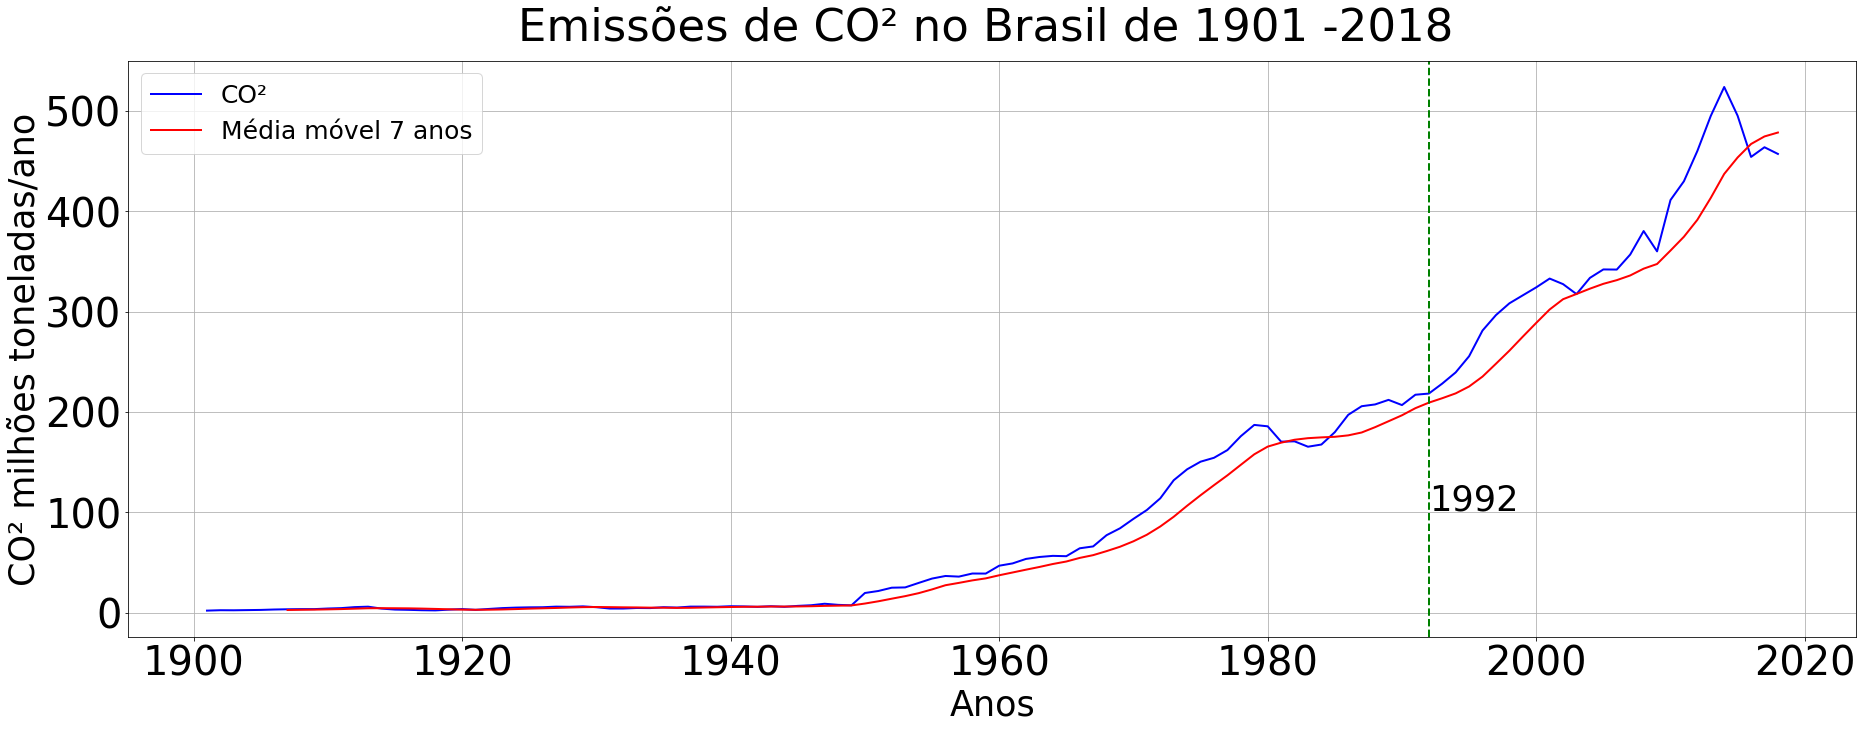

In [9]:
#Estabelecendo o tamanho do gráfico
fig=plt.figure(figsize=(24,8))
eixo = fig.add_axes([0,0,1,1])
#Criando o gráfico de emissão de CO2 por ano na cor azul e legenda
eixo.plot(bra['year'], bra['co2'],color='b',label='CO²',linewidth=2)
eixo.plot(bra['year'],bra['co2'].rolling(7).mean(), color='r',label='Média móvel 7 anos',linewidth=2)
#Colocando título do gráfico e escolhendo o tamanho da fonte
eixo.set_title('Emissões de CO² no Brasil de 1901 -2018 ', fontsize=45, pad=20)
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Anos', fontsize=35)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
eixo.set_ylabel('CO² milhões toneladas/ano', fontsize=35)
#Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 40)
#Colocando um grid no fundo do gráfico
eixo.grid(True)
#Colocando a legenda e o tamanho da fonte
eixo.legend(fontsize=25)
#Colocando uma linha vertical tracejada no eixo 'X' de cor preta
eixo.axvline(x=1992, color='g', linestyle='--',linewidth=2)
#Escrevendo na área selecionada no ponto 'xy' e escolhendo o tamanho da fonte
eixo.annotate('1992', xy=(1992,102), fontsize=35)

No gráfico acima é possível destacar um aumento na quantidade de emissões de CO² no Brasil a partir do ano de 1949 e se mantém até o ano de 2018. No ano de 1992, ocorreu uma conferência das Nações Unidas (ECO-92) no Rio de Janeiro, na qual foi alertado sobre os riscos do aumento de CO² na atmosfera. Porém, de 1992 (linha verde) até 2018, o Brasil aumentou as emissões de CO² na atmosfera acompanhando uma tendência mundial. Diversos fatores podem ter contribuído para esse aumento ao longo dos anos, porém ações mais efetivas para controlar o problema deveriam ser implantadas. Através da média móvel (linha vermelha), é possível visualizar uma têndencia crescente de emissões de CO² no Brasil até o ano de 2018.

### Analisando mudanças por ano das emissões:

Text(2014, 42, ' 2014')

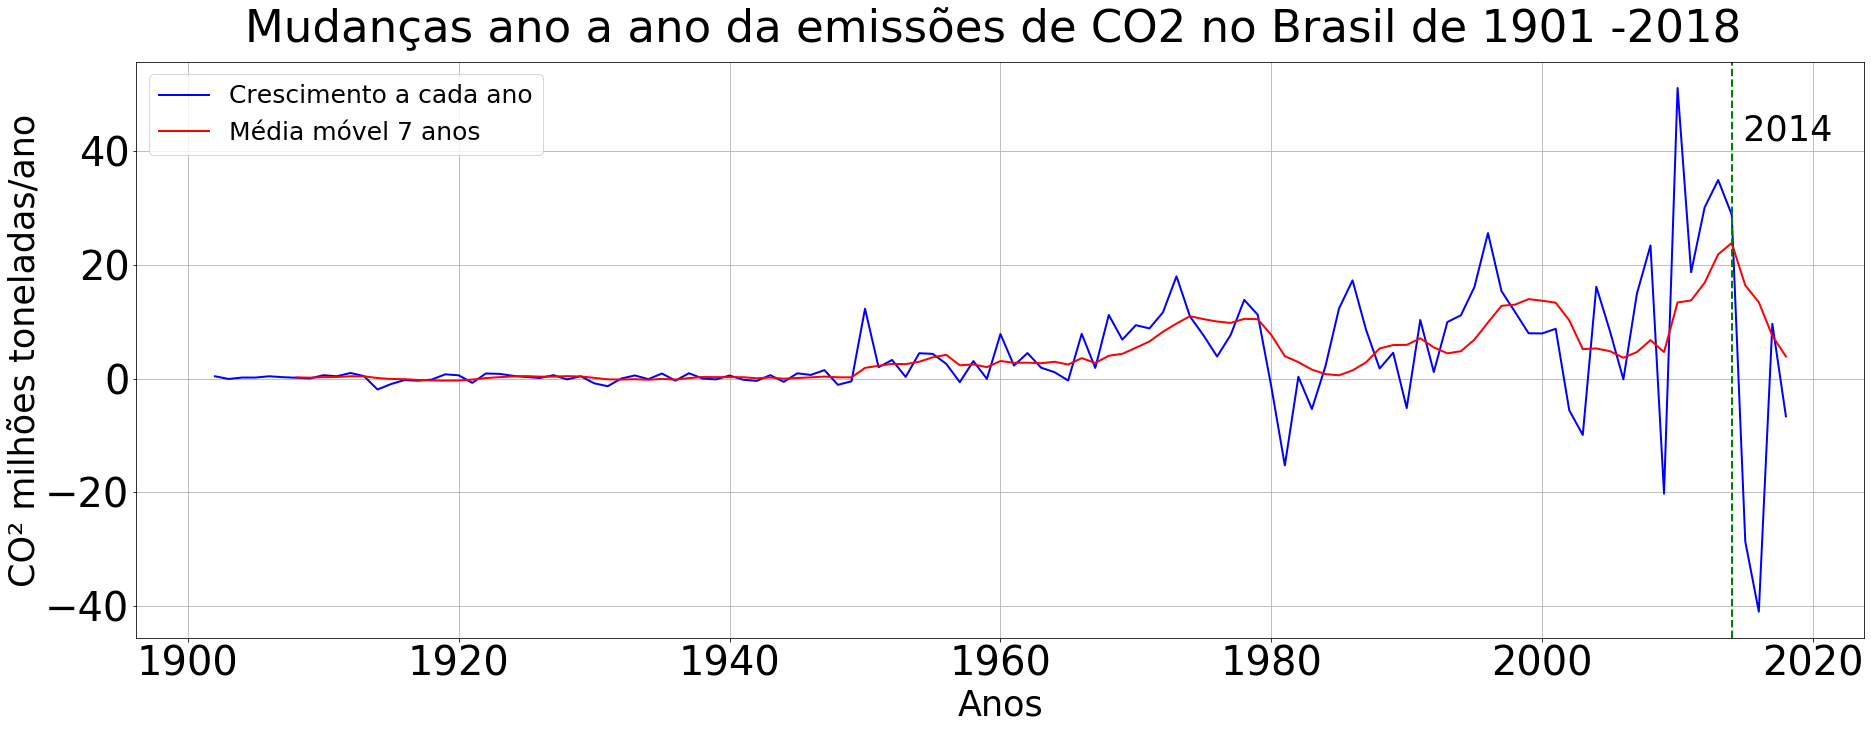

In [10]:
#Estabelecendo o tamanho do gráfico
fig=plt.figure(figsize=(24,8))
eixo = fig.add_axes([0,0,1,1])
#Criando o gráfico do crescimento de emissões de CO2 de um ano para o outro na cor vermelha e legenda
eixo.plot(bra['year'], bra['co2_growth_abs'],color='b',label='Crescimento a cada ano',linewidth=2)
eixo.plot(bra['year'],bra['co2_growth_abs'].rolling(7).mean(), color='r',label='Média móvel 7 anos',linewidth=2)
#Colocando título do gráfico e escolhendo o tamanho da fonte
eixo.set_title('Mudanças ano a ano da emissões de CO2 no Brasil de 1901 -2018 ', fontsize=45, pad=20)
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Anos', fontsize=35)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
eixo.set_ylabel('CO² milhões toneladas/ano', fontsize=35)
#Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 40)
#Colocando um grid no fundo do gráfico
eixo.grid(True)
#Colocando a legenda e o tamanho da fonte
eixo.legend(fontsize=25)
#Colocando uma linha vertical tracejada no eixo 'X' de cor preta
eixo.axvline(x=2014, color='g', linestyle='--',linewidth=2)
#Escrevendo na área selecionada no ponto 'xy' e escolhendo o tamanho da fonte
eixo.annotate(' 2014', xy=(2014,42), fontsize=35)

No gráfico acima é possível observar que houve um crescimento anual das emissões de CO2 a partir de 1949 e uma tendência de diminuição desse crescimento a partir de 2014 (média móvel). Entretanto, essa diminuição ao longo dos últimos anos (2014-2018) ainda não foi suficiente para diminuir a tendência geral de aumento que se mantém desde 1949. É possível que seja necessário mais alguns anos de decréscimos das emissões de CO² para que possa ser visualizada uma dimunição na tendência geral das emissões de CO² no Brasil. 

### Analisando os tipos das emissões de CO²:

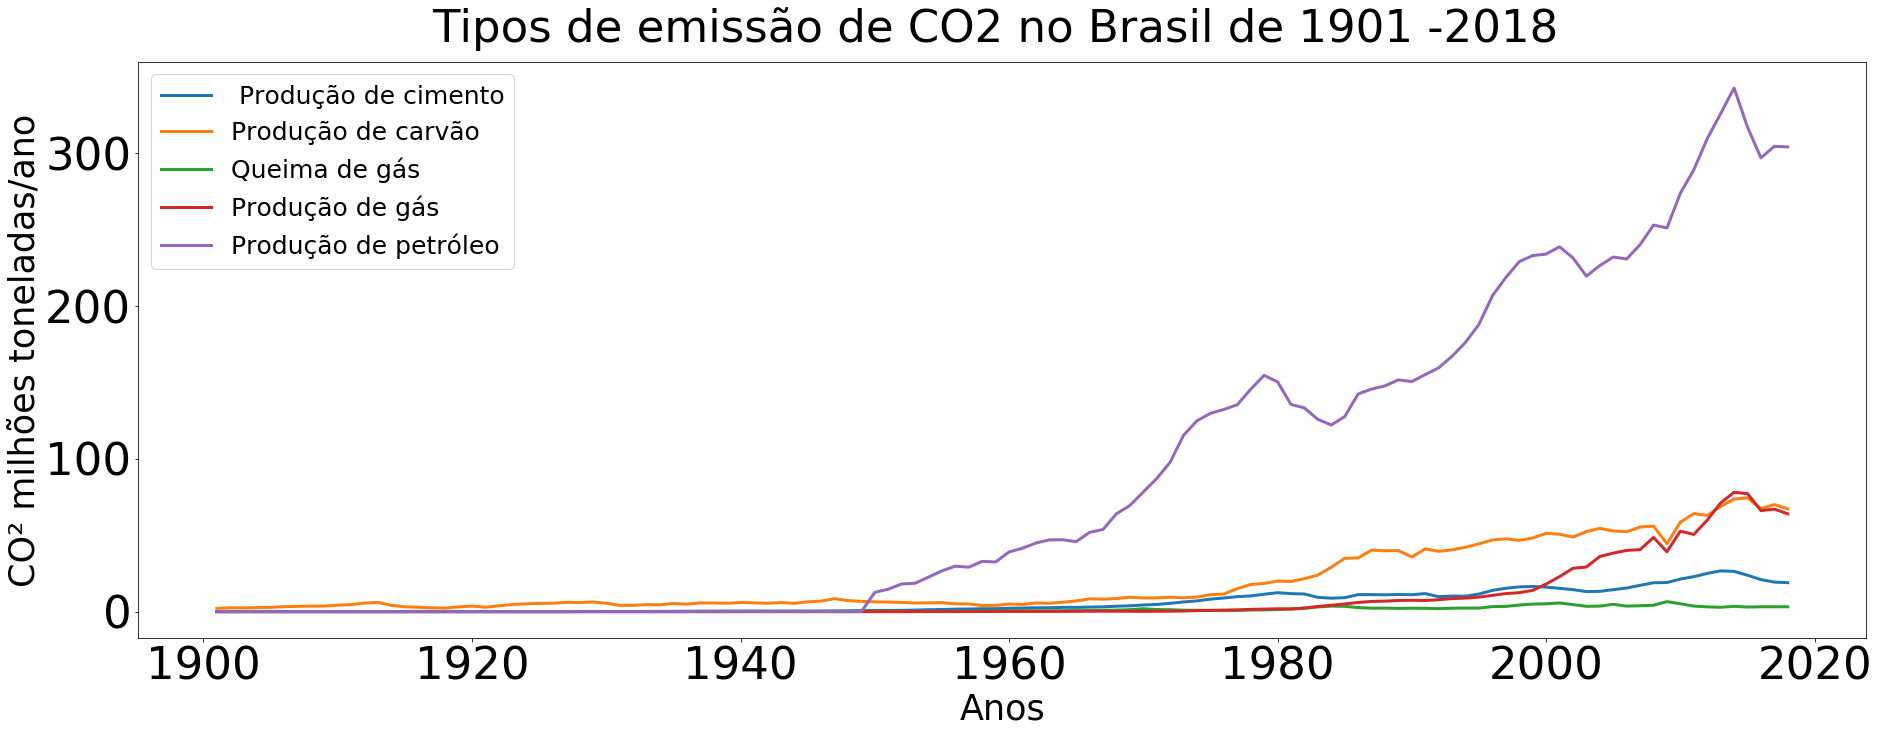

In [11]:
#Estabelecendo o tamanho do gráfico
fig=plt.figure(figsize=(24,8))
eixo = fig.add_axes([0,0,1,1])
#Criando o gráfico dos tipos de combustíveis usados nas emissões de CO2 e legenda
eixo.plot(bra['year'], bra['cement_co2'],label=' Produção de cimento', linewidth=3)
eixo.plot(bra['year'], bra['coal_co2'],label='Produção de carvão',linewidth=3)
eixo.plot(bra['year'], bra['flaring_co2'],label='Queima de gás',linewidth=3)
eixo.plot(bra['year'], bra['gas_co2'],label='Produção de gás',linewidth=3)
eixo.plot(bra['year'], bra['oil_co2'],label='Produção de petróleo',linewidth=3)
#Colocando título do gráfico e escolhendo o tamanho da fonte
eixo.set_title('Tipos de emissão de CO2 no Brasil de 1901 -2018 ', fontsize=45, pad= 20)
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
eixo.set_xlabel('Anos', fontsize=35)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
eixo.set_ylabel('CO² milhões toneladas/ano', fontsize=35)
#Aumentando o tamanho dos rótulos do gráfico
eixo.tick_params(labelsize = 45)
#Inserindo a legenda e o tamanho da fonte
eixo.legend(fontsize=25)

Segundo este conjunto de dados, é possível observar que a produção de petróleo(oil) foi a que mais contribuiu para o aumento das emissões de CO2 no Brasil, ocorrendo esse aumento a partir de 1949-1950, coincidindo assim com o aumento geral dessas. Talvez essa seja a principal emissão de CO² que deva ser controlada para que haja uma diminuição significativa no Brasil. Dessa maneira, o investimento em outros tipos de energia, como por exemplo a solar, pode ser um caminho para a diminuição dessas emissões de CO² no Brasil.     